# App Reviews Sentiment Analysis

App Reviews Sentiment Analysis means evaluating and understanding the sentiment expressed in user reviews of mobile applications.

In [7]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\Pooja Sambhwani\\Python Programming (Regex)\\Datasets\\linkedin-reviews.csv")

In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we can explore furthur, such as analyzing the length of reviews, and possibly derive insights from the text of the reviews.

# Plotting the distribution of ratings

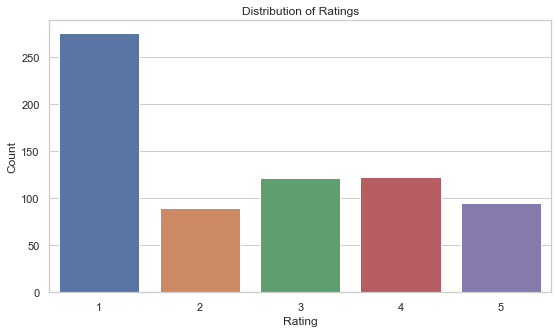

In [11]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df, x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Adding Sentiment Labels in the Data

We will use Textblob library. Textblob provides a polarity scores raning from -1(very negative) to 1(very positive) for a given text. We can use this score to classify each review's sentiment as positive, negative or neutral.

In [12]:
# Step1: first clean the data, clean the column of reviews 
# import textblob library: used for analyzing sentiments
# 0.1 positive reviews
# -0.1 negative reviews
# 0 neutral reviews
# feature engineering is used for creating new column : sentiment analysis

In [13]:
!pip install textblob

  Attempting uninstall: regex
    Found existing installation: regex 2020.6.8
    Uninstalling regex-2020.6.8:
      Successfully uninstalled regex-2020.6.8
  Attempting uninstall: nltk
    Found existing installation: nltk 3.5
    Uninstalling nltk-3.5:
      Successfully uninstalled nltk-3.5


In [14]:
from textblob import TextBlob

In [15]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [16]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [17]:
df.sample(5)

,Review,Rating,Sentiment
580,New version is very good,5,Positive
444,Stopped working after last update... Not good ...,1,Neutral
328,Terribly slow. Often fails to connect and as a...,1,Negative
376,App is super buggy on Xoom with Honeycomb 3.1....,3,Positive
61,Keeps refreshing and often opening a linkedin ...,2,Positive


# Analyzing App Reviews Sentiments

In [18]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Positive    298
Neutral     297
Negative    107
Name: Sentiment, dtype: int64

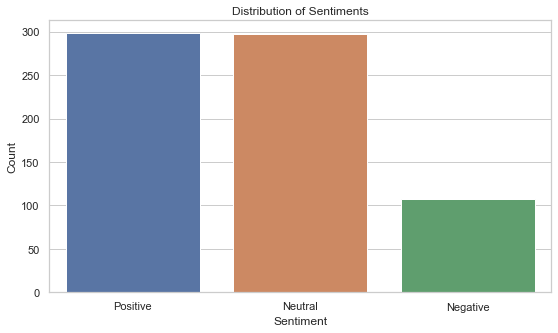

In [19]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index, y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# So we can see althrough the app has low ratings, still the reviewers don't use namy negative words in the words in the reviews for the app.

Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings.

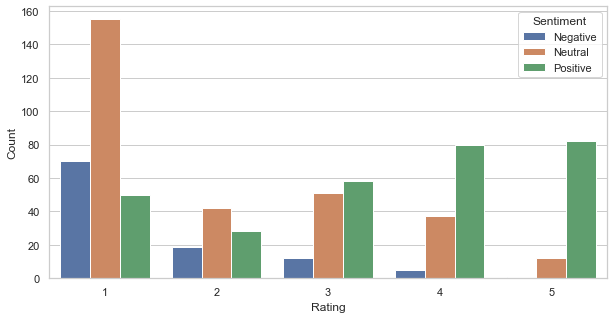

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Rating', hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

# Summary

App Reviews 